In [55]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import precision_score, recall_score, f1_score  
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
df = pd.read_excel('Train_Data.xlsx')

In [30]:
df.shape

(4894, 23)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 23 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Price Tier                                                       0 non-null      float64
 4   Ticket Type                                                      4894 non-null   object 
 5   Attendee #                                                       4490 non-null   float64
 6   Group                                                            0 non-null      float64
 7   Order Type                                

In [32]:
df.head()

,First Name,Email ID,Quantity,Price Tier,Ticket Type,Attendee #,Group,Order Type,Currency,Total Paid,...,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,ANIKET,aniket@xyz.com,1,NaN,Art of Resume Building,2.213855e+09,NaN,Free Order,USD,0,...,Attending,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,NaN,6.7,2,5,Placed
1,Dhanshree,dhanshree@xyz.com,1,NaN,Art of Resume Building,2.213859e+09,NaN,Free Order,USD,0,...,Attending,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,NaN,8.2,3,2,Not placed
2,Dhiraj,dhiraj@xyz.com,1,NaN,Art of Resume Building,2.213862e+09,NaN,Free Order,USD,0,...,Attending,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,NaN,6.5,4,3,Not placed
3,Pooja,pooja@xyz.com,1,NaN,Art of Resume Building,2.213988e+09,NaN,Free Order,USD,0,...,Attending,Pillai College of Engineering New Panvel,Email,NaN,Students,NaN,8.7,2,5,Not placed
4,Aayush,aayush@xyz.com,1,NaN,Art of Resume Building,2.214567e+09,NaN,Free Order,USD,0,...,Attending,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,NaN,9.1,3,5,Placed


In [33]:
# Checking for null values
df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Price Tier                                                         4894
Ticket Type                                                           0
Attendee #                                                          404
Group                                                              4894
Order Type                                                            0
Currency                                                            404
Total Paid                                                            0
Fees Paid                                                           404
Eventbrite Fees                                                       0
Eventbrite Payment Processing                                         0
Attendee Status                                                 

In [34]:
df.describe()

,Quantity,Price Tier,Attendee #,Group,Total Paid,Fees Paid,Eventbrite Fees,Eventbrite Payment Processing,CGPA,Speaking Skills,ML Knowledge
count,4894.0,0.0,4.490000e+03,0.0,4894.0,4490.0,4894.0,4894.0,4894.000000,4894.000000,4894.000000
mean,1.0,NaN,2.537633e+09,NaN,0.0,0.0,0.0,0.0,8.038476,3.392930,3.380466
std,0.0,NaN,8.520970e+08,NaN,0.0,0.0,0.0,0.0,1.005184,1.186768,1.185233
min,1.0,NaN,1.937670e+09,NaN,0.0,0.0,0.0,0.0,6.200000,1.000000,1.000000
25%,1.0,NaN,1.984708e+09,NaN,0.0,0.0,0.0,0.0,7.200000,2.000000,2.000000
50%,1.0,NaN,2.081662e+09,NaN,0.0,0.0,0.0,0.0,7.900000,3.000000,3.000000
75%,1.0,NaN,2.465114e+09,NaN,0.0,0.0,0.0,0.0,8.900000,5.000000,4.000000
max,1.0,NaN,4.322836e+09,NaN,0.0,0.0,0.0,0.0,9.900000,5.000000,5.000000


# Preprocessing


In [36]:
df.drop_duplicates(subset ='Email ID',keep = 'first',inplace = True)

In [37]:
df.shape

(1987, 23)

In [38]:
df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Price Tier                                                         1987
Ticket Type                                                           0
Attendee #                                                          222
Group                                                              1987
Order Type                                                            0
Currency                                                            222
Total Paid                                                            0
Fees Paid                                                           222
Eventbrite Fees                                                       0
Eventbrite Payment Processing                                         0
Attendee Status                                                 

In [39]:
df = df.dropna(subset=['College Name'])

In [40]:
df.isnull().sum()

First Name                                                            0
Email ID                                                              0
Quantity                                                              0
Price Tier                                                         1977
Ticket Type                                                           0
Attendee #                                                          218
Group                                                              1977
Order Type                                                            0
Currency                                                            218
Total Paid                                                            0
Fees Paid                                                           218
Eventbrite Fees                                                       0
Eventbrite Payment Processing                                         0
Attendee Status                                                 

In [41]:
data = df[['First Name','Email ID','College Name','Year of Graduation','CGPA','Speaking Skills','ML Knowledge','Designation','Placement Status']]

In [42]:
data.isnull().sum()

First Name               0
Email ID                 0
College Name             0
Year of Graduation    1697
CGPA                     0
Speaking Skills          0
ML Knowledge             0
Designation              0
Placement Status      1321
dtype: int64

In [43]:
# Define a dictionary to map values
mapping = {'Placed': 1, 'Not placed': 0}

# Replace values in the column using the dictionary
data['Placement Status'] = data['Placement Status'].replace(mapping)


C:\Users\yashr\AppData\Local\Temp\ipykernel_2580\292882669.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Placement Status'] = data['Placement Status'].replace(mapping)


In [46]:
value_counts = data['Designation'].value_counts()

# Select significant values (you can adjust the number based on your needs)
significant_values = value_counts.index[:5]

# Replace values not in significant_values with 'Others'
data.loc[~data['Designation'].isin(significant_values), 'Designation'] = 'Others'

In [47]:
data.Designation.value_counts()

Students                    1837
Others                        68
Intern                        28
Asst. Professor               17
Engineering                   14
Data Science and Analyst      13
Name: Designation, dtype: int64

In [49]:

label_encoder = LabelEncoder()

# Fit and transform the 'Designation' column
data['Encoded_Designation'] = label_encoder.fit_transform(df['Designation'])

C:\Users\yashr\AppData\Local\Temp\ipykernel_2580\2459008708.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Encoded_Designation'] = label_encoder.fit_transform(df['Designation'])


# Data Analysis

In [52]:
data

,First Name,Email ID,College Name,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Designation,Placement Status,Encoded_Designation
0,ANIKET,aniket@xyz.com,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,NaN,6.7,2,5,Students,1.0,5
1,Dhanshree,dhanshree@xyz.com,AP SHAH INSTITUTE OF TECHNOLOGY,NaN,8.2,3,2,Students,0.0,5
2,Dhiraj,dhiraj@xyz.com,Don Bosco College of Engineering Fatorda Goa,NaN,6.5,4,3,Students,0.0,5
3,Pooja,pooja@xyz.com,Pillai College of Engineering New Panvel,NaN,8.7,2,5,Students,0.0,5
4,Aayush,aayush@xyz.com,St Xavier's College,NaN,9.1,3,5,Students,1.0,5
...,...,...,...,...,...,...,...,...,...,...
4829,Kevin,kevin@xyz.com,pillai college of engineering new panvel,NaN,9.1,5,4,Students,NaN,5
4831,Hemil,hemil@xyz.com,"vidyalankar institute of technology, mumbai",NaN,7.4,3,2,Students,NaN,5
4832,Shitij,shitij@xyz.com,government polytechnic gandhinagar,NaN,7.3,4,4,Students,NaN,5
4834,dirgh,dirgh@xyz.com,"vishwakarma institute of technology, pune",NaN,9.2,4,2,Students,NaN,5


In [53]:
data.corr()['Placement Status']

C:\Users\yashr\AppData\Local\Temp\ipykernel_2580\2276344294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Placement Status']


CGPA                  -0.003365
Speaking Skills       -0.004394
ML Knowledge           0.039475
Placement Status       1.000000
Encoded_Designation         NaN
Name: Placement Status, dtype: float64

In [54]:
data.corr()['CGPA']

C:\Users\yashr\AppData\Local\Temp\ipykernel_2580\3762076789.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['CGPA']


CGPA                   1.000000
Speaking Skills        0.021713
ML Knowledge           0.012302
Placement Status      -0.003365
Encoded_Designation   -0.024062
Name: CGPA, dtype: float64

In [56]:
data.describe()

,CGPA,Speaking Skills,ML Knowledge,Placement Status,Encoded_Designation
count,1977.000000,1977.000000,1977.000000,656.000000,1977.000000
mean,8.027213,3.398584,3.408700,0.315549,4.846737
std,1.006240,1.203469,1.198382,0.465089,0.672087
min,6.200000,1.000000,1.000000,0.000000,0.000000
25%,7.200000,2.000000,2.000000,0.000000,5.000000
50%,7.900000,3.000000,3.000000,0.000000,5.000000
75%,8.900000,5.000000,5.000000,1.000000,5.000000
max,9.900000,5.000000,5.000000,1.000000,5.000000


Univariate analysis

0.0    449
1.0    207
Name: Placement Status, dtype: int64

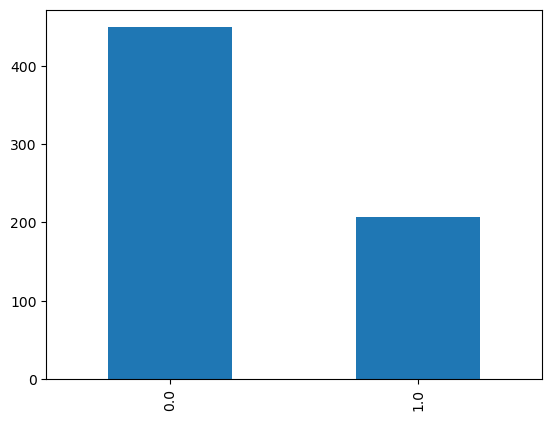

In [59]:
data['Placement Status'].value_counts().plot(kind = 'bar')
data['Placement Status'].value_counts()

<Axes: >

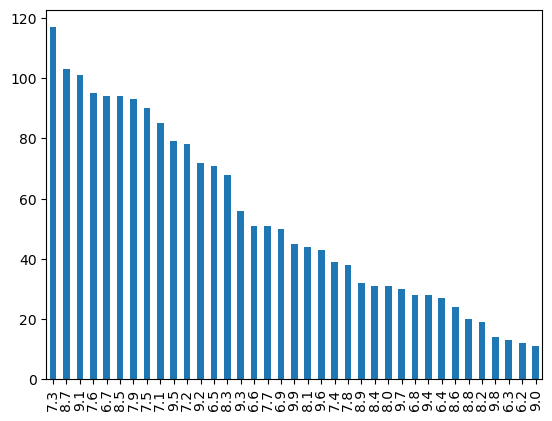

In [60]:
data.CGPA.value_counts().plot(kind = 'bar')

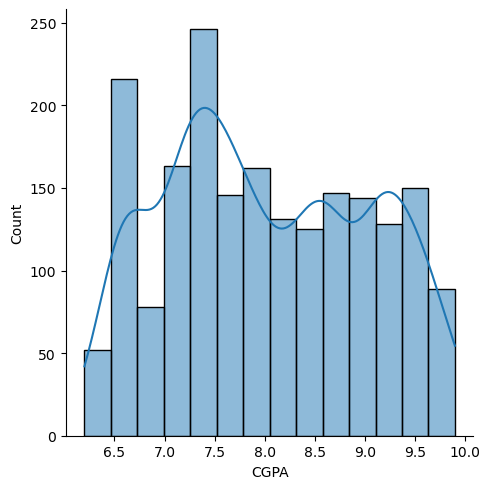

In [61]:
sns.displot(data.CGPA,kde=True)

<Axes: >

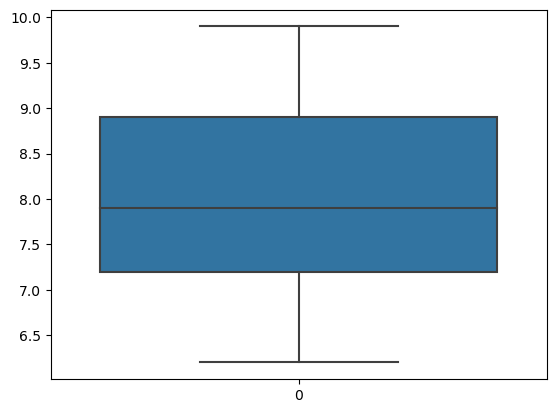

In [62]:
sns.boxplot(data.CGPA)

Bivariate Analysis

<Axes: xlabel='Speaking Skills', ylabel='CGPA'>

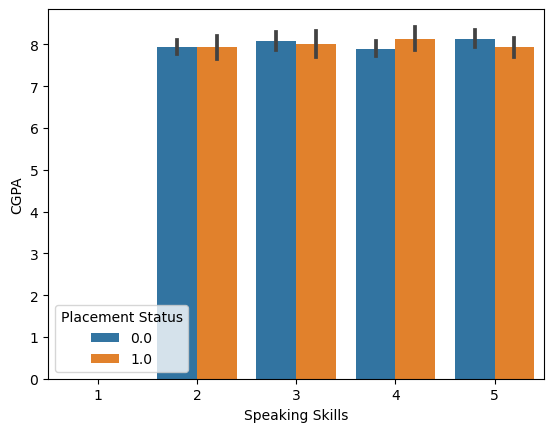

In [64]:
sns.barplot(data = data ,x = 'Speaking Skills',y='CGPA',hue = 'Placement Status')

<Axes: xlabel='Placement Status', ylabel='ML Knowledge'>

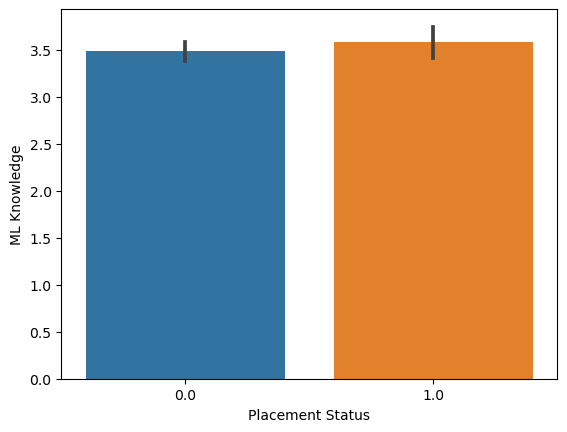

In [65]:
sns.barplot(data=data,x='Placement Status',y="ML Knowledge")

<Axes: xlabel='Speaking Skills', ylabel='ML Knowledge'>

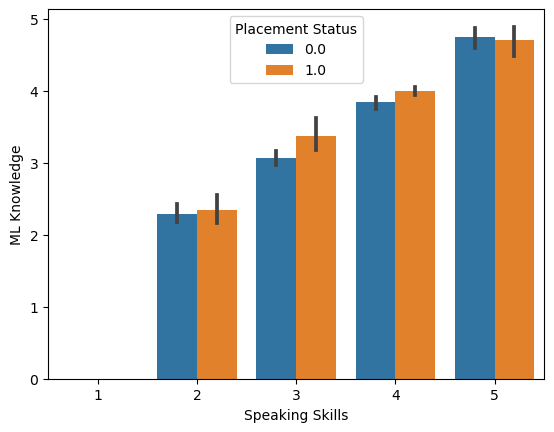

In [66]:
sns.barplot(data=data,x='Speaking Skills',y="ML Knowledge",hue = 'Placement Status')

<Axes: xlabel='Speaking Skills', ylabel='CGPA'>

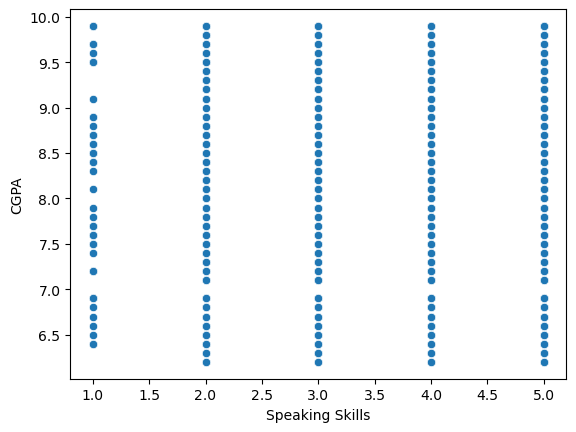

In [67]:
sns.scatterplot(data = data,x='Speaking Skills',y='CGPA',legend='brief')

<Axes: xlabel='Speaking Skills', ylabel='CGPA'>

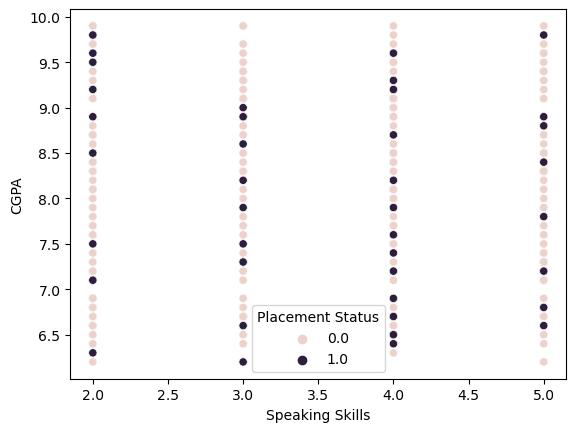

In [68]:
sns.scatterplot(data = data,x='Speaking Skills',y='CGPA',hue='Placement Status')

<Axes: xlabel='Speaking Skills', ylabel='CGPA'>

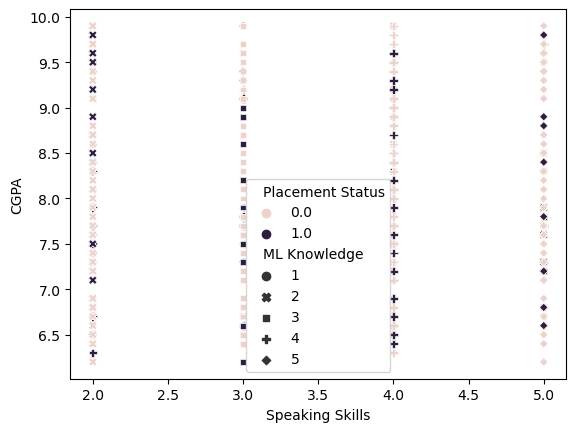

In [69]:
sns.scatterplot(data = data,x='Speaking Skills',y='CGPA',hue='Placement Status',style='ML Knowledge')

<Axes: xlabel='Speaking Skills', ylabel='CGPA'>

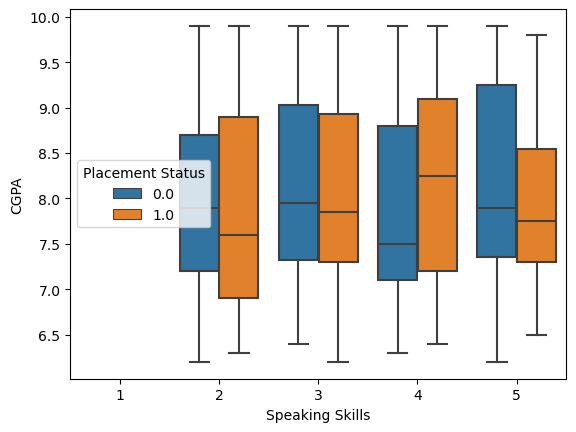

In [70]:
sns.boxplot(data=data,x='Speaking Skills',y='CGPA',hue='Placement Status')

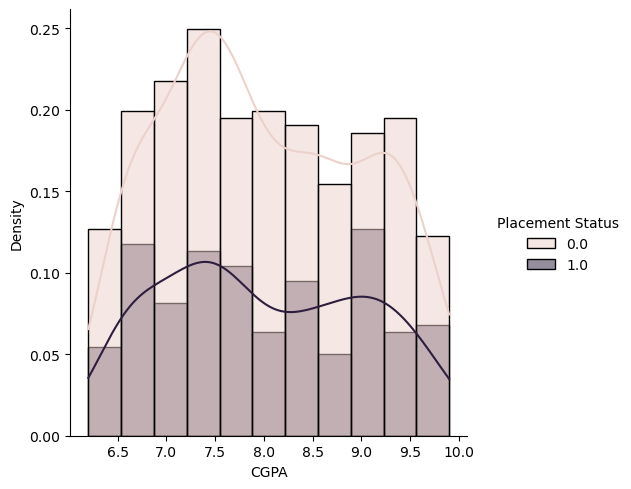

In [71]:
sns.displot(data=data,x='CGPA',kde=True,hue ='Placement Status',stat = 'density')

C:\Users\yashr\AppData\Local\Temp\ipykernel_2580\825855345.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  (data.groupby('CGPA').mean()['Placement Status']*100).plot(kind = 'bar')


<Axes: xlabel='CGPA'>

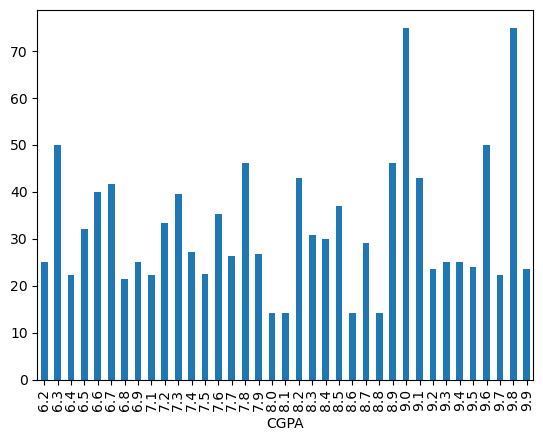

In [73]:
(data.groupby('CGPA').mean()['Placement Status']*100).plot(kind = 'bar')

In [75]:
data.sample(3)

,First Name,Email ID,College Name,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Designation,Placement Status,Encoded_Designation
1866,Shiwangi,shiwangi@xyz.com,"vidyalankar institute of technology, mumbai",NaN,9.2,5,5,Students,NaN,5
842,Kishan,kishan@xyz.com,G H Raisoni institut of engineering and techno...,NaN,8.1,5,5,Students,0.0,5
4456,VIJYA,vijya@xyz.com,"b. k. birla college of arts, science & commerc...",Third year,9.6,4,2,Students,NaN,5


<Axes: xlabel='Speaking Skills', ylabel='CGPA'>

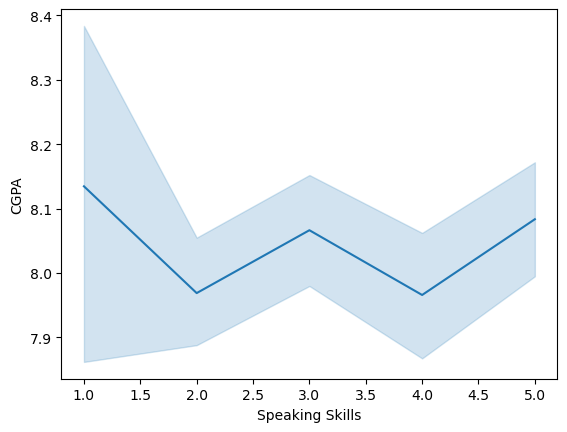

In [76]:
sns.lineplot(data=data,x='Speaking Skills',y='CGPA')

<Axes: xlabel='ML Knowledge', ylabel='CGPA'>

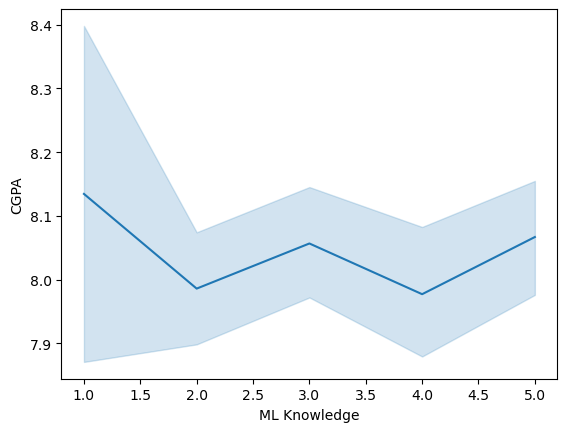

In [77]:
sns.lineplot(data=data,x='ML Knowledge',y='CGPA')

Custom Imputation: On the basis of above analysis of the data a better guess is made for the missing values, alternatively we can create any custom imputation strategy based on the analysis.

In [81]:
# custom imputation of 'Placement Status' data 
data.loc[(data['CGPA'] >= 7.5) & (data['Placement Status'].isnull()), 'Placement Status'] = 1
data.loc[(data['CGPA'] < 7.5) & (data['Placement Status'].isnull()), 'Placement Status'] = 0

In [82]:
data.shape

(1977, 10)

In [83]:
data.isnull().sum()

First Name                0
Email ID                  0
College Name              0
Year of Graduation     1697
CGPA                      0
Speaking Skills           0
ML Knowledge              0
Designation               0
Placement Status          0
Encoded_Designation       0
dtype: int64

In [85]:
data['Placement Status'].value_counts()

1.0    1088
0.0     889
Name: Placement Status, dtype: int64

In [92]:
data.sample(2)

,First Name,Email ID,College Name,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Designation,Placement Status,Encoded_Designation
560,Sidharrth,sidharrth@xyz.com,"thakur institute of management studies, career...",NaN,7.3,4,4,Students,0.0,5
1750,Syed Irfan,syedirfan@xyz.com,Wilson college,NaN,8.1,3,3,Students,1.0,5


In [86]:
# Selecting the necessary features after preprocessing
X = data[['CGPA','Speaking Skills','ML Knowledge','Encoded_Designation']]

In [89]:
# Target variable
y = data.iloc[:,-2]

In [93]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [94]:
# Scaling  the selected columns

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Selecting the best fitted algorithm for the given problem based on accuracy, cv score , MSE and COD

In [96]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.803030303030303
Cross validation score :  0.7414365517679171
Mean squared error: 0.20
Coefficient of determination: 0.21


In [97]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.797979797979798
Cross validation score :  0.7740398654224592
Mean squared error: 0.20
Coefficient of determination: 0.19


In [98]:
# Support vector classifier
from sklearn.svm import SVC
clf = SVC()

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.803030303030303
Cross validation score :  0.7835809052244017
Mean squared error: 0.20
Coefficient of determination: 0.21


In [99]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.7929292929292929
Cross validation score :  0.7802164667047546
Mean squared error: 0.21
Coefficient of determination: 0.17


In [100]:
# Gradient boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=250, random_state=50)

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.8080808080808081
Cross validation score :  0.8010061575572907
Mean squared error: 0.19
Coefficient of determination: 0.23


In [101]:
from xgboost import XGBClassifier
clf = XGBClassifier(n_estimators=100, random_state=50)

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.803030303030303
Cross validation score :  0.7925760172665524
Mean squared error: 0.20
Coefficient of determination: 0.21


In [103]:
from sklearn.linear_model import LogisticRegressionCV  
clf = LogisticRegressionCV(cv=5, random_state=0)  

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.803030303030303
Cross validation score :  0.7583031803466007
Mean squared error: 0.20
Coefficient of determination: 0.21


In [105]:
from sklearn.naive_bayes import BernoulliNB  
clf = BernoulliNB()

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# model evaluation
print("Accuracy score : ",accuracy_score(y_test,y_pred))
print("Cross validation score : ",cross_val_score(clf,X_train,y_train,cv=10).mean())
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Accuracy score :  0.7575757575757576
Cross validation score :  0.6970164413127657
Mean squared error: 0.24
Coefficient of determination: 0.03


Clearly Gradient Boost Classifier is the best

# Predicting the placement value from Test_Data

In [107]:
newData= pd.read_excel('Test_Data.xlsx',usecols=['First Name','Email ID','Designation','Year of Graduation','CGPA','Speaking Skills','ML Knowledge','Placement Status'])

In [108]:
# Test Data
newData

,First Name,Email ID,Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status
0,Sahil,sahil@xyz.com,Students,NaN,7.8,3,3,NaN
1,Amrita,amrita@xyz.com,Students,NaN,9.1,3,3,NaN
2,Mamta,mamta@xyz.com,Students,NaN,6.9,2,2,NaN
3,Bhagyashri,bhagyashri@xyz.com,Students,NaN,8.4,4,4,NaN
4,Divyanshu,divyanshu@xyz.com,Students,NaN,6.7,5,5,NaN
...,...,...,...,...,...,...,...,...
3791,Saif ali,saifali@xyz.com,Students,2021,9.0,3,2,NaN
3792,Lankesh,lankesh@xyz.com,Students,2021,7.2,4,3,NaN
3793,Sanjay,sanjay@xyz.com,Students,2021,8.5,2,3,NaN
3794,Sushmita,sushmita@xyz.com,Students,2021,6.5,5,5,NaN


In [114]:
# Some processing to the Designation column
value_counts = newData['Designation'].value_counts()

# Select significant values 
significant_values = value_counts.index[:5]

# Replace values not in significant_values with 'Others'
newData.loc[~newData['Designation'].isin(significant_values), 'Designation'] = 'Others'

In [116]:
newData.Designation.value_counts()

Students                    3446
Others                       171
Intern                        74
Engineering                   38
Data Science and Analyst      34
Asst. Professor               33
Name: Designation, dtype: int64

In [121]:
# Encoding the Designation column
label_encoder = LabelEncoder()

# Fit and transform the 'Designation' column
newData['Encoded_Designation'] = label_encoder.fit_transform(newData['Designation'])

In [122]:
newData

,First Name,Email ID,Designation,Year of Graduation,CGPA,Speaking Skills,ML Knowledge,Placement Status,Encoded_Designation
0,Sahil,sahil@xyz.com,Students,NaN,7.8,3,3,NaN,5
1,Amrita,amrita@xyz.com,Students,NaN,9.1,3,3,NaN,5
2,Mamta,mamta@xyz.com,Students,NaN,6.9,2,2,NaN,5
3,Bhagyashri,bhagyashri@xyz.com,Students,NaN,8.4,4,4,NaN,5
4,Divyanshu,divyanshu@xyz.com,Students,NaN,6.7,5,5,NaN,5
...,...,...,...,...,...,...,...,...,...
3791,Saif ali,saifali@xyz.com,Students,2021,9.0,3,2,NaN,5
3792,Lankesh,lankesh@xyz.com,Students,2021,7.2,4,3,NaN,5
3793,Sanjay,sanjay@xyz.com,Students,2021,8.5,2,3,NaN,5
3794,Sushmita,sushmita@xyz.com,Students,2021,6.5,5,5,NaN,5


In [125]:
# Selecting the necessary features for prediction from Test data
X = newData[['CGPA','Speaking Skills','ML Knowledge','Encoded_Designation']]
X = scaler.transform(X)

In [127]:
# Applying  algorithm..

# Gradient boosting Classifier..
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=250, random_state=50)

# model training
clf.fit(X_train,y_train)
y_pred = clf.predict(X)

In [129]:
# Adding the predicted placement values to the dataframe
newData['Placement Status'] = y_pred

In [132]:
# Deleting unnecessary column
del newData['Encoded_Designation']

In [133]:
# Taking output as excel file
newData.to_excel("FinalPredictionResult.xlsx")